Importando bibliotecas usadas


*   numpy usada para lidar com arrays
*   matplotlib usada para lidar com plot de graficos
*   pandas usada para lidar com dataframes (tabelas)
*   csv para leitura de arquivos em csv
*   pickle usada importar os dados em plk para ser usado em dicionario python
*   coolab files para importar dados de fora para dentro do colab
*   Classification_report para ver os resultados da classificação
*   SMOTE para lidar com desbalanceamento de dados (oversampling)









In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle
from google.colab import files
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from math import sqrt
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
tf.__version__

'2.5.0'

Criando dicionarios com os atributos

A ideia de diferentes dicionarios é separar as atividades para facilitar o classificador ter menos dificuldades

In [3]:
ds1 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO4':[],'INFO5':[],'INFO6':[],'VM':[],'ACTIVITY':[]}

Fazendo upload do arquivo no colab

In [4]:
uploaded = files.upload()

Saving testeNovoDic.pkl to testeNovoDic.pkl


Carregando o arquivo em dicionario python


In [5]:
a_file = open("testeNovoDic.pkl", "rb")
dicPronto = pickle.load(a_file)
a_file.close()

Separando os arquivos em diferentes dicionario baseado em atividade

In [6]:
for i in dicPronto:
            
    if i == 'Slow walk (1.8 mph)' or i == '400m walk' or i == 'Carrying groceries':#i == 'Simulated Bowling' or i == 'Tai-chi' or i == 'Vacuuming' or i == 'Laundry' or i == 'Slow walk (1.8 mph)' or i == '400m walk' or i == 'Carrying groceries' or i == 'Crossword puzzles' or i == 'Playing cards' or i== 'Dusting' or i== 'Self-care (miscellaneous)' or i== 'Organizing the room' or i== 'Gardening':
        for a in dicPronto[i]:
            ds1['INFO1'].append(a[0])
            ds1['INFO2'].append(a[1])
            ds1['INFO3'].append(a[2])
            ds1['INFO4'].append(a[3])
            ds1['INFO5'].append(a[4])
            ds1['INFO6'].append(a[5])
            ds1['ACTIVITY'].append(i)
            

    else:
        print(i)

Playing cards
Laundry
Dusting
Vacuuming
Simulated Bowling
Crossword puzzles
Self-care (miscellaneous)
Organizing the room
Gardening
Tai-chi


In [7]:
print(len(ds1['INFO1']))
print(len(ds1['INFO2']))
print(len(ds1['INFO3']))
print(len(ds1['INFO4']))
print(len(ds1['INFO5']))
print(len(ds1['INFO6']))
print(len(ds1['ACTIVITY']))

21528
21528
21528
21528
21528
21528
21528


In [8]:
for a in range(len(ds1['INFO1'])):
  ds1['VM'].append(sqrt(ds1['INFO1'][a]**2+ds1['INFO2'][a]**2+ds1['INFO3'][a]**2))

Fazendo a criação do dataframe(Tabela)

In [9]:
sep1 = pd.DataFrame(ds1)

Printando o historiograma e descrevendo o dataframe

------------------------Cluster 1------------------------
              INFO1         INFO2  ...         INFO6            VM
count  21528.000000  21528.000000  ...  21528.000000  21528.000000
mean      43.183993     37.608835  ...      1.069955     76.317797
std       40.546892     35.577389  ...      0.368465     52.893639
min        0.000000      0.000000  ...      0.000000      0.000000
25%       23.000000     11.000000  ...      1.000000     47.039876
50%       37.000000     30.000000  ...      1.000000     67.242100
75%       53.000000     53.000000  ...      1.000000     92.326865
max      684.000000    485.000000  ...      3.000000    726.881696

[8 rows x 7 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde14b34650>,
      dtype=object)

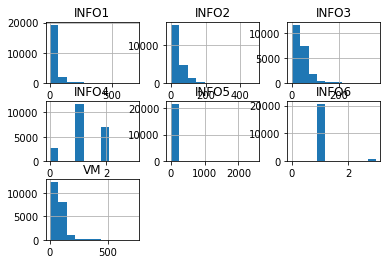

In [10]:

print('------------------------Cluster 1------------------------')
print(sep1.describe())
sep1.hist()


In [11]:
print(sep1)

       INFO1  INFO2  INFO3  INFO4  INFO5  INFO6         VM             ACTIVITY
0          0      0      0      0     34      3   0.000000  Slow walk (1.8 mph)
1          0     17      0      0      0      3  17.000000  Slow walk (1.8 mph)
2          0     26      0      0      0      3  26.000000  Slow walk (1.8 mph)
3          0      0      0      0      0      3   0.000000  Slow walk (1.8 mph)
4          0      0      0      0      0      3   0.000000  Slow walk (1.8 mph)
...      ...    ...    ...    ...    ...    ...        ...                  ...
21523     75      4     12      2      0      1  76.059187   Carrying groceries
21524     59      4      9      2      0      1  59.816386   Carrying groceries
21525     61     19     11      1      0      1  64.830548   Carrying groceries
21526     38     28      8      2      0      1  47.874837   Carrying groceries
21527     13     11     33      0      0      1  37.134889   Carrying groceries

[21528 rows x 8 columns]


In [12]:
ohe=pd.get_dummies(sep1['ACTIVITY'])

In [13]:
ohe

,400m walk,Carrying groceries,Slow walk (1.8 mph)
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
21523,0,1,0
21524,0,1,0
21525,0,1,0
21526,0,1,0


Fazendo o oversampling e separando os X e y

In [14]:
X = sep1.iloc[:, :-1].values
y = ohe.iloc[:, :].values

In [15]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)
#print(y)


In [16]:
print(X)

[[ 0.          0.          0.         ... 34.          3.
   0.        ]
 [ 0.         17.          0.         ...  0.          3.
  17.        ]
 [ 0.         26.          0.         ...  0.          3.
  26.        ]
 ...
 [61.         19.         11.         ...  0.          1.
  64.83054835]
 [38.         28.          8.         ...  0.          1.
  47.87483681]
 [13.         11.         33.         ...  0.          1.
  37.13488926]]


In [17]:
print(y)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


Regularizando os valores (A ideia é que os numeros não pesem na média e nos calculos)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Separando os teste e treino para os futuros testes do classificador

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Criando ANN


In [20]:
ann = tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [23]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

Compilando ANN


In [24]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Treinando ANN


In [25]:
hist = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
539/539 [==============================] - 2s 2ms/step - loss: 0.8481 - accuracy: 0.6219
Epoch 2/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7604 - accuracy: 0.6640
Epoch 3/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7409 - accuracy: 0.6701
Epoch 4/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7322 - accuracy: 0.6756
Epoch 5/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7234 - accuracy: 0.6817
Epoch 6/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7173 - accuracy: 0.6828
Epoch 7/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7147 - accuracy: 0.6885
Epoch 8/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7096 - accuracy: 0.6929
Epoch 9/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7072 - accuracy: 0.6935
Epoch 10/100
539/539 [==============================] - 1s 1ms/step - loss: 0.7044 - accura

In [26]:
perf = ann.evaluate(X_test,y_test)

135/135 [==============================] - 0s 977us/step - loss: 0.6597 - accuracy: 0.7197


media da acuracia


In [27]:
np.mean(hist.history['accuracy'])

0.7166020208597184

desvio padrão

In [28]:
np.std(hist.history['accuracy'])

0.016668585516973373